<a href="https://colab.research.google.com/github/tselane2110/Explainable-AI-for-Robot-Telemetry-Data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important Note: Since my roll number is `even`, therefore I will be training 1-D CNN, XGBoost and FNN only.

### 0. Importing Libraries

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import os
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time
from tensorflow.keras.utils import to_categorical

### 1. Cloning the github repo to extract the dataset

In [2]:
!git clone https://github.com/tselane2110/Explainable-AI-for-Robot-Telemetry-Data

Cloning into 'Explainable-AI-for-Robot-Telemetry-Data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.06 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (7/7), done.


### 2. Extracting the Dataset

In [3]:
!unzip /content/Explainable-AI-for-Robot-Telemetry-Data/RawData -d /content/

Archive:  /content/Explainable-AI-for-Robot-Telemetry-Data/RawData.zip
   creating: /content/RawData/
   creating: /content/RawData/Dos-Drone/
  inflating: /content/RawData/Dos-Drone/Dos1.csv  
  inflating: /content/RawData/Dos-Drone/Dos2.csv  
   creating: /content/RawData/Malfunction-Drone/
  inflating: /content/RawData/Malfunction-Drone/Malfunction1.csv  
  inflating: /content/RawData/Malfunction-Drone/Malfunction2.csv  
   creating: /content/RawData/NormalFlight/
  inflating: /content/RawData/NormalFlight/Normal1.csv  
  inflating: /content/RawData/NormalFlight/Normal2.csv  
  inflating: /content/RawData/NormalFlight/Normal3.csv  
  inflating: /content/RawData/NormalFlight/Normal4.csv  
  inflating: /content/RawData/ReadMeForDataSet.txt  


### 3. Loading Datasets

In [4]:
# reading the csv files

df_dos1 = pd.read_csv("/content/RawData/Dos-Drone/Dos1.csv")
df_dos2 = pd.read_csv("/content/RawData/Dos-Drone/Dos2.csv")
df_malfunction1 = pd.read_csv("/content/RawData/Malfunction-Drone/Malfunction1.csv")
df_malfunction2 = pd.read_csv("/content/RawData/Malfunction-Drone/Malfunction2.csv")
df_normal1 = pd.read_csv("/content/RawData/NormalFlight/Normal1.csv")
df_normal2 = pd.read_csv("/content/RawData/NormalFlight/Normal2.csv")
df_normal3 = pd.read_csv("/content/RawData/NormalFlight/Normal3.csv")
df_normal4 = pd.read_csv("/content/RawData/NormalFlight/Normal4.csv")

#### DoS Datasets

In [5]:
df_dos1.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729405e+09,1,0,33.69785,73.016496,1.25,1.729405e+09,4605.0,1.729405e+09,...,1.0,1.0,5.0,1.729405e+09,1.0,-39.0,1.729405e+09,15.2,1.729405e+09,5.6
1,1,1.729405e+09,2,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729405e+09,3,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729405e+09,4,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729405e+09,5,0,33.69785,73.016496,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_dos2.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729787e+09,570,0,33.636530,72.99146,1.279,1.729787e+09,12473.0,1.729787e+09,...,0.0,1.0,5.0,1.729787e+09,0.642857,-65.0,1.729787e+09,3.9,1.729787e+09,6.5
1,1,1.729787e+09,664,0,33.636530,72.99146,1.279,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729787e+09,1177,0,33.636530,72.99146,1.279,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729787e+09,1374,0,33.636529,72.99146,1.272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729787e+09,1417,0,33.636529,72.99146,1.272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# adding a new column in both dos1 and dos2
df_dos1["class"] = "DoS_Attack"
df_dos2["class"] = "DoS_Attack"

#### Malfunction Datasets

In [8]:
df_malfunction1.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729406e+09,1,0,33.69788,73.016504,1.25,1.729406e+09,8332.0,1.729406e+09,...,1.0,1.0,5.0,1.729406e+09,0.985714,-41.0,1.729406e+09,44.9,1.729406e+09,11.2
1,1,1.729406e+09,2,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729406e+09,3,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729406e+09,4,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729406e+09,5,0,33.69788,73.016504,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_malfunction2.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729688e+09,59,0,33.63709,72.991302,1.25,1.729688e+09,21351.0,1.729688e+09,...,0.0,1.0,5.0,1.729688e+09,0.8,-54.0,1.729688e+09,7.3,1.729688e+09,7.6
1,1,1.729688e+09,66,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729688e+09,369,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729688e+09,2111,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729688e+09,2112,0,33.63709,72.991303,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# adding a new column in both malfunction1 and malfunction2
df_malfunction1["class"] = "Malfunction"
df_malfunction2["class"] = "Malfunction"

#### Normal Datasets

In [11]:
df_normal1.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729315e+09,137,0,33.707308,73.019849,1.25,1.729315e+09,14916.0,1.729315e+09,...,0.0,1.0,5.0,1.729315e+09,1.0,-40.0,1.729315e+09,9.6,1.729315e+09,5.9
1,1,1.729315e+09,139,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729315e+09,141,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729315e+09,147,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729315e+09,155,0,33.707308,73.019849,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_normal2.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729686e+09,2,0,33.637079,72.991263,1.25,1.729686e+09,0.0,1.729686e+09,...,0.0,1.0,3.0,1.729686e+09,1.0,-40.0,1.729686e+09,0.8,1.729686e+09,5.6
1,1,1.729686e+09,3,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729686e+09,4,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729686e+09,5,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729686e+09,6,0,33.637079,72.991263,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_normal3.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729874e+09,351,0,33.636576,72.991521,1.25,1.729874e+09,8469.0,1.729874e+09,...,0.0,1.0,5.0,1.729874e+09,0.957143,-43.0,1.729874e+09,6.2,1.729874e+09,5.5
1,1,1.729874e+09,355,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729874e+09,1648,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729874e+09,1699,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729874e+09,1826,0,33.636576,72.991521,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_normal4.head(5)

,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
0,0,1.729786e+09,7,0,33.636539,72.991440,1.25,1.729786e+09,270.0,1.729786e+09,...,0.0,1.0,3.0,1.729786e+09,0.814286,-53.0,1.729786e+09,1.3,1.729786e+09,5.7
1,1,1.729786e+09,452,0,33.636539,72.991440,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.729786e+09,1206,0,33.636539,72.991439,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.729786e+09,1235,0,33.636539,72.991439,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.729786e+09,1247,0,33.636539,72.991439,1.25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# adding a new column in all normal-drone dfs
df_normal1["class"] = "Normal"
df_normal2["class"] = "Normal"
df_normal3["class"] = "Normal"
df_normal4["class"] = "Normal"

### Concatenating all datasets and dropping duplicates

In [16]:
dfs = [df_dos1, df_dos2, df_malfunction1, df_malfunction2, df_normal1, df_normal2, df_normal3, df_normal4]

df = pd.concat(dfs, ignore_index=True).drop_duplicates()


### Data Preprocessing

#### Dropping Null rows and cols

In [17]:
df = df.dropna(axis=1, how='all').dropna(axis=0, how='all')

In [18]:
df.describe()

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,S.No,setpoint_raw-global_Time,setpoint_raw-global_header.seq,setpoint_raw-global_header.stamp.secs,setpoint_raw-global_latitude,setpoint_raw-global_longitude,setpoint_raw-global_altitude,battery_Time,battery_header.seq,battery_header.stamp.secs,...,state_guided,state_manual_input,state_system_status,RSSI_Time,RSSI_Quality,RSSI_Signal,CPU_Time,CPU_Percent,RAM_Time,Used_RAM_MB
count,87417.000000,8.741700e+04,87417.000000,87417.0,87417.000000,87417.000000,87417.000000,4.349000e+03,4349.000000,4.349000e+03,...,466.000000,466.0,466.000000,8.500000e+01,85.000000,85.000000,1.820000e+02,182.000000,5.530000e+02,553.000000
mean,6633.756363,1.729593e+09,126929.651487,0.0,33.664535,73.002702,4.374865,1.729626e+09,8946.337089,1.729626e+09,...,0.699571,1.0,4.841202,1.729613e+09,0.902185,-46.470588,1.729647e+09,15.958791,1.729644e+09,10.234720
std,4566.256233,2.001018e+05,98296.621753,0.0,0.031810,0.012993,2.820141,2.045361e+05,6819.779788,2.045361e+05,...,0.458937,0.0,0.512739,2.072144e+05,0.095030,7.105645,1.975626e+05,15.360037,1.964418e+05,10.221969
min,0.000000,1.729315e+09,1.000000,0.0,33.636529,72.991018,1.250000,1.729315e+09,0.000000,1.729315e+09,...,0.000000,1.0,3.000000,1.729315e+09,0.628571,-66.000000,1.729315e+09,0.000000,1.729315e+09,4.900000
25%,2781.000000,1.729405e+09,52717.000000,0.0,33.636642,72.991309,2.269000,1.729405e+09,712.000000,1.729405e+09,...,0.000000,1.0,5.000000,1.729405e+09,0.828571,-52.000000,1.729406e+09,7.525000,1.729406e+09,5.600000
50%,5903.000000,1.729686e+09,118526.000000,0.0,33.637122,72.991634,3.451000,1.729686e+09,8704.000000,1.729686e+09,...,1.000000,1.0,5.000000,1.729688e+09,0.914286,-46.000000,1.729688e+09,10.500000,1.729688e+09,5.800000
75%,9794.000000,1.729786e+09,176584.000000,0.0,33.697880,73.016555,5.978000,1.729787e+09,15015.000000,1.729787e+09,...,1.000000,1.0,5.000000,1.729786e+09,1.000000,-40.000000,1.729787e+09,16.725000,1.729787e+09,6.600000
max,17868.000000,1.729874e+09,450486.000000,0.0,33.707439,73.019869,15.985000,1.729874e+09,21832.000000,1.729874e+09,...,1.000000,1.0,5.000000,1.729874e+09,1.000000,-34.000000,1.729874e+09,99.300000,1.729874e+09,44.000000


In [19]:
# dropping S.NO bcz not needed
df.drop(columns=["S.No"], inplace=True)

In [20]:
df.columns, len(df.columns)

(Index(['setpoint_raw-global_Time', 'setpoint_raw-global_header.seq',
        'setpoint_raw-global_header.stamp.secs', 'setpoint_raw-global_latitude',
        'setpoint_raw-global_longitude', 'setpoint_raw-global_altitude',
        'battery_Time', 'battery_header.seq', 'battery_header.stamp.secs',
        'battery_voltage', 'battery_current', 'battery_temperature',
        'battery_percentage', 'global_position-local_Time',
        'global_position-local_header.seq',
        'global_position-local_header.stamp.secs',
        'global_position-local_pose.pose.position.x',
        'global_position-local_pose.pose.position.y',
        'global_position-local_pose.pose.position.z',
        'global_position-local_pose.pose.orientation.x',
        'global_position-local_pose.pose.orientation.y',
        'global_position-local_pose.pose.orientation.z',
        'global_position-local_twist.twist.linear.x',
        'global_position-local_twist.twist.linear.y',
        'global_position-local_twist

In [21]:
# how many null rows each column has
null_stats = pd.DataFrame({
    "null_count": df.isna().sum(),
    "null_percent": df.isna().mean() * 100
})

print(null_stats.to_string())

                                               null_count  null_percent
setpoint_raw-global_Time                                0      0.000000
setpoint_raw-global_header.seq                          0      0.000000
setpoint_raw-global_header.stamp.secs                   0      0.000000
setpoint_raw-global_latitude                            0      0.000000
setpoint_raw-global_longitude                           0      0.000000
setpoint_raw-global_altitude                            0      0.000000
battery_Time                                        83068     95.024995
battery_header.seq                                  83068     95.024995
battery_header.stamp.secs                           83068     95.024995
battery_voltage                                     83068     95.024995
battery_current                                     83068     95.024995
battery_temperature                                 83068     95.024995
battery_percentage                                  83068     95

This is bad!  But we probably can't delete all these so will look for a solution!

### Handling Missing Data

In [22]:
# Step 1: Drop columns with more than 80% null values
null_percent = df.isna().mean() * 100
columns_to_keep = null_percent[null_percent <= 80].index.tolist()
df = df[columns_to_keep].copy()

# Step 2: Keep only rows that have at least 3 non-null values
df = df[df.notna().sum(axis=1) >= 3].copy()

# Step 3: Fill remaining nulls with median for numeric, mode for categorical
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        if col != 'class':
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 0)

# Step 4: Encode the target variable
df['class_encoded'] = df['class'].map({'Normal': 0, 'DoS_Attack': 1, 'Malfunction': 2})

# Step 5: Split features and target
X = df.drop(['class', 'class_encoded'], axis=1)
y = df['class_encoded']

# Step 6: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Cleaned data shape: {df.shape}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

Cleaned data shape: (87417, 8)
Training samples: 69933
Testing samples: 17484
Features: 6


### 1. XGBoost

In [23]:
# Step 8: Train XGBoost (quick first model)
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = xgb_model.predict(X_test)
print("XGBoost Results:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'DoS_Attack', 'Malfunction']))

XGBoost Results:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      9960
  DoS_Attack       1.00      1.00      1.00      3918
 Malfunction       1.00      1.00      1.00      3606

    accuracy                           1.00     17484
   macro avg       1.00      1.00      1.00     17484
weighted avg       1.00      1.00      1.00     17484



### 2. 1-D CNN

In [24]:
# Step 10: Prepare data for 1D-CNN (reshape for time-series like structure)
# We'll treat each row as a "time step" with multiple features
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 11: One-hot encode labels for CNN
y_train_cnn = to_categorical(y_train, num_classes=3)
y_test_cnn = to_categorical(y_test, num_classes=3)

# Step 12: Build 1D-CNN
cnn_model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Step 13: Evaluate CNN
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)
print("\n1D-CNN Results:")
print(classification_report(y_test, cnn_pred_classes, target_names=['Normal', 'DoS_Attack', 'Malfunction']))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8248 - loss: 0.4197 - val_accuracy: 0.9528 - val_loss: 0.1194
Epoch 2/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9631 - loss: 0.0983 - val_accuracy: 0.9594 - val_loss: 0.0820
Epoch 3/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9686 - loss: 0.0828 - val_accuracy: 0.9783 - val_loss: 0.0666
Epoch 4/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9704 - loss: 0.0745 - val_accuracy: 0.9552 - val_loss: 0.1019
Epoch 5/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0674 - val_accuracy: 0.9788 - val_loss: 0.0612
Epoch 6/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9742 - loss: 0.0601 - val_accuracy: 0.9803 - val_loss: 0.0572
Epoch 7/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0580 - val_accuracy: 0.9721 - val_loss: 0.0542
Epoch 8/10
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9761 - loss: 0.0558 

### 3. FNN

In [25]:
# Step 14: Build FNN (Feed Forward Neural Network)
fnn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

fnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
fnn_model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

# Step 15: Evaluate FNN
fnn_pred = fnn_model.predict(X_test)
fnn_pred_classes = np.argmax(fnn_pred, axis=1)
print("\nFNN Results:")
print(classification_report(y_test, fnn_pred_classes, target_names=['Normal', 'DoS_Attack', 'Malfunction']))

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1967/1967 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8170 - loss: 0.4164 - val_accuracy: 0.9745 - val_loss: 0.0771
Epoch 2/15
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9599 - loss: 0.0973 - val_accuracy: 0.9788 - val_loss: 0.0572
Epoch 3/15
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9713 - loss: 0.0730 - val_accuracy: 0.9797 - val_loss: 0.0524
Epoch 4/15
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9734 - loss: 0.0671 - val_accuracy: 0.9745 - val_loss: 0.0632
Epoch 5/15
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9756 - loss: 0.0623 - val_accuracy: 0.9811 - val_loss: 0.0433
Epoch 6/15
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9753 - loss: 0.0575 - val_accuracy: 0.9811 - val_loss: 0.0454
Epoch 7/15
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0590 - val_accuracy: 0.9807 - val_loss: 0.0491
Epoch 8/15
1967/1967 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9757 - loss: 0.0578 - val_accur

In [26]:
# Step 16: Compare all models
print("Model Comparison:")
print("-" * 50)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"1D-CNN Accuracy: {accuracy_score(y_test, cnn_pred_classes):.4f}")
print(f"FNN Accuracy: {accuracy_score(y_test, fnn_pred_classes):.4f}")

Model Comparison:
--------------------------------------------------
XGBoost Accuracy: 1.0000
1D-CNN Accuracy: 0.9808
FNN Accuracy: 0.9802


### XAI

In [27]:
# Install SHAP and LIME for XAI
!pip install shap lime eli5 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 10.5 MB/s eta 0:00:00


### XAI Analysis


 XGBOOST FEATURE IMPORTANCE
----------------------------------------
Total features available: 6
Feature importance shape: (6,)

All Features by Importance:
------------------------------
 1. setpoint_raw-global_longitude            : 0.4973
 2. setpoint_raw-global_latitude             : 0.2921
 3. setpoint_raw-global_Time                 : 0.1360
 4. setpoint_raw-global_altitude             : 0.0583
 5. setpoint_raw-global_header.seq           : 0.0164
 6. setpoint_raw-global_header.stamp.secs    : 0.0000


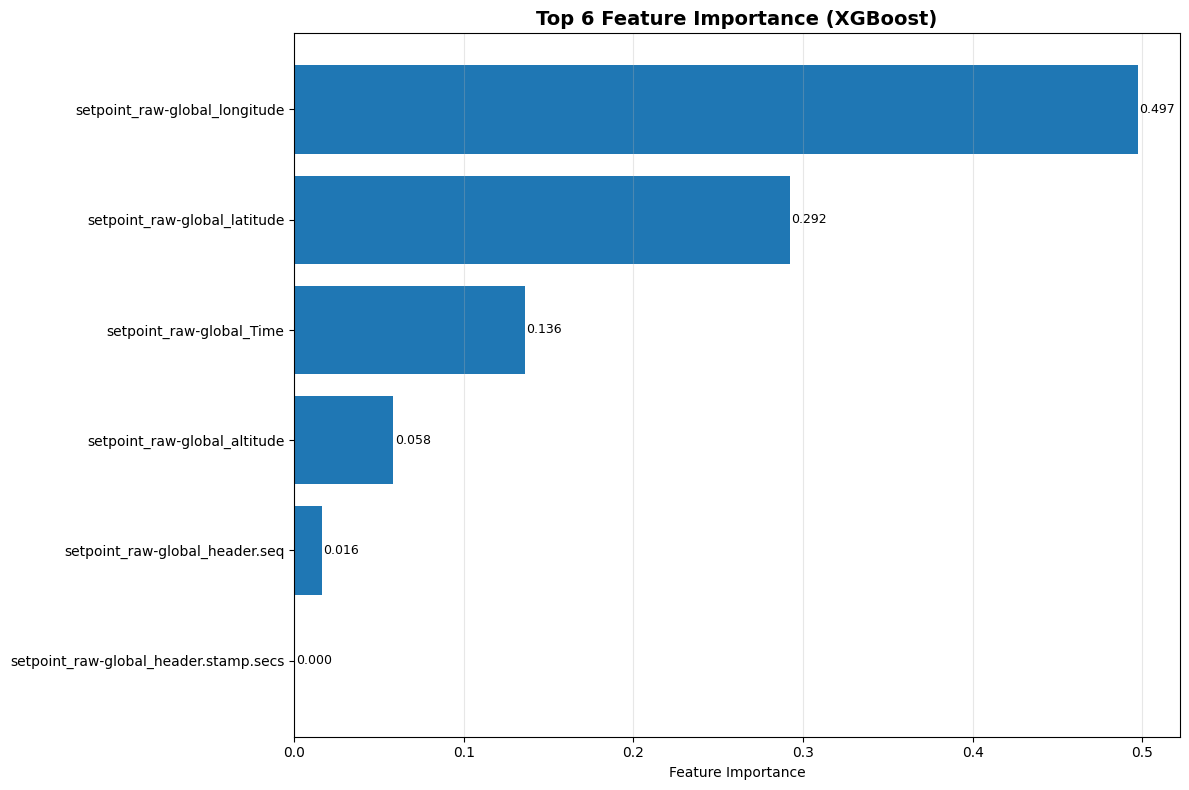


 FEATURE CORRELATION WITH TARGET
----------------------------------------
Features Correlated with Target:
----------------------------------------
 1. setpoint_raw-global_Time                 : 0.3118
 2. setpoint_raw-global_header.stamp.secs    : nan
 3. setpoint_raw-global_longitude            : 0.2789
 4. setpoint_raw-global_latitude             : 0.2733
 5. setpoint_raw-global_header.seq           : 0.1537
 6. setpoint_raw-global_altitude             : 0.1463


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


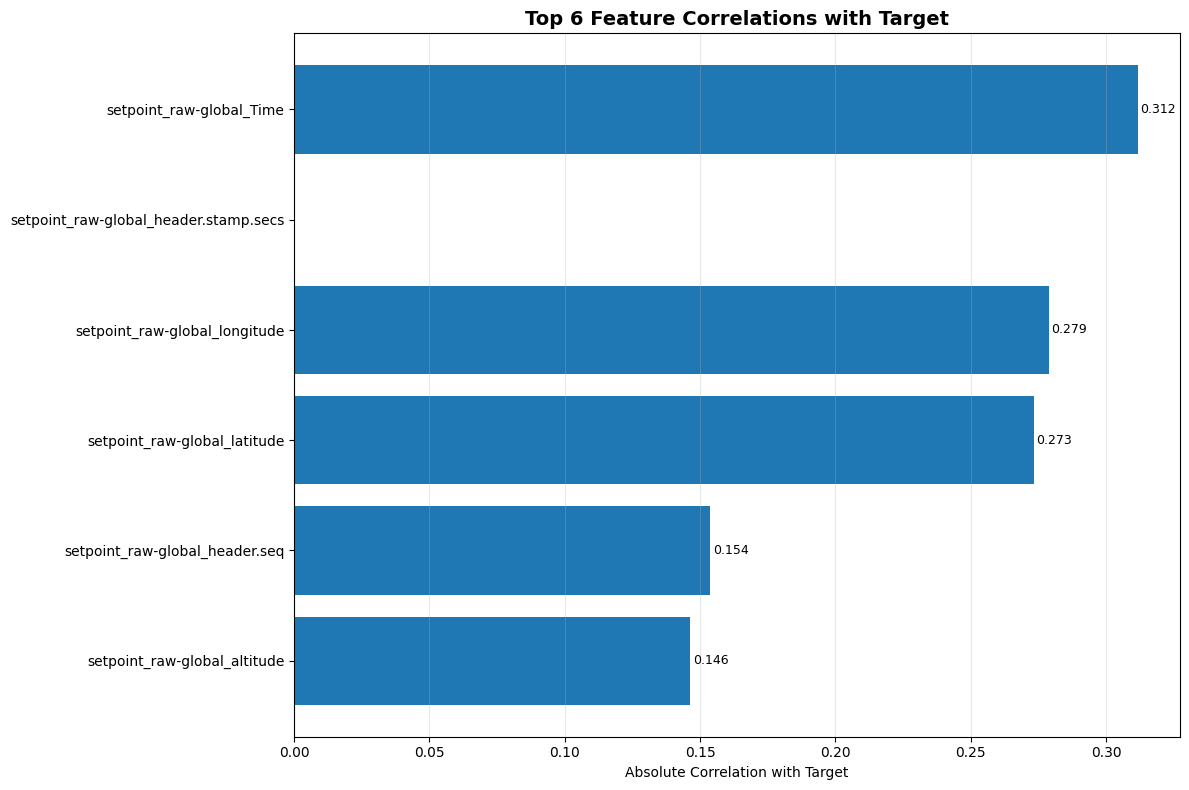


 PARTIAL DEPENDENCE ANALYSIS
----------------------------------------
Analyzing partial dependence for: ['setpoint_raw-global_longitude', 'setpoint_raw-global_latitude', 'setpoint_raw-global_Time']
  • setpoint_raw-global_longitude:
    Range: -0.90 to 1.32
    Predictions range: 0.45 to 1.09
  • setpoint_raw-global_latitude:
    Range: -0.88 to 1.35
    Predictions range: 0.32 to 1.19
  • setpoint_raw-global_Time:
    Range: -1.39 to 1.40
    Predictions range: 0.79 to 1.21


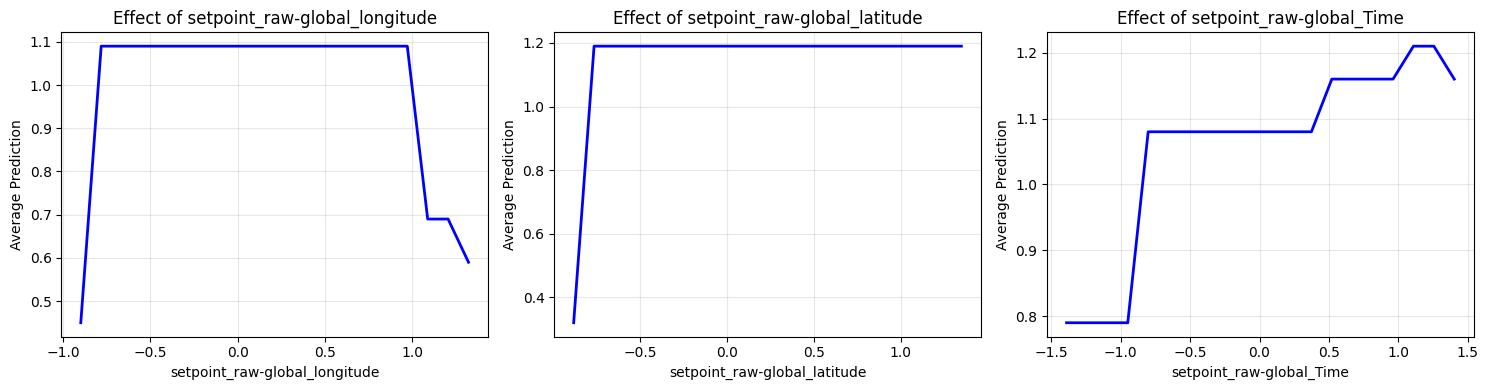


 INDIVIDUAL PREDICTION EXPLANATIONS
----------------------------------------

 Sample from Normal class (Sample #1):
   Actual: Normal
   Predicted: Normal
   Confidence: 99.99%
   Top influencing features (absolute values):
   • setpoint_raw-global_Time:
     Value: 0.964
     Importance: 0.1360
     Impact: Low impact
   • setpoint_raw-global_altitude:
     Value: -0.896
     Importance: 0.0583
     Impact: Low impact
   • setpoint_raw-global_latitude:
     Value: -0.880
     Importance: 0.2921
     Impact: Low impact

 Sample from DoS_Attack class (Sample #2):
   Actual: DoS_Attack
   Predicted: DoS_Attack
   Confidence: 99.99%
   Top influencing features (absolute values):
   • setpoint_raw-global_longitude:
     Value: 1.067
     Importance: 0.4973
     Impact: Medium impact
   • setpoint_raw-global_latitude:
     Value: 1.050
     Importance: 0.2921
     Impact: Medium impact
   • setpoint_raw-global_Time:
     Value: -0.939
     Importance: 0.1360
     Impact: Low impact

 Samp

In [31]:
# ========== 1. FEATURE IMPORTANCE ==========
print("\n XGBOOST FEATURE IMPORTANCE")
print("-"*40)

# Get feature importance from XGBoost
feature_importance = xgb_model.feature_importances_
feature_names = X.columns.tolist()

print(f"Total features available: {len(feature_names)}")
print(f"Feature importance shape: {feature_importance.shape}")

# Create sorted list
importance_dict = dict(zip(feature_names, feature_importance))
sorted_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nAll Features by Importance:")
print("-"*30)
for i, (feature, importance) in enumerate(sorted_features):
    print(f"{i+1:2}. {feature:40} : {importance:.4f}")

# Plot only available features
num_features = len(sorted_features)
features_to_plot = min(10, num_features)
features_top = [f[0] for f in sorted_features[:features_to_plot]]
importance_top = [f[1] for f in sorted_features[:features_to_plot]]

plt.figure(figsize=(12, 8))
bars = plt.barh(range(features_to_plot), importance_top)
plt.yticks(range(features_to_plot), features_top)
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title(f'Top {features_to_plot} Feature Importance (XGBoost)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, imp) in enumerate(zip(bars, importance_top)):
    plt.text(imp + 0.001, i, f'{imp:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('feature_importance_xgboost.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 2. CORRELATION ANALYSIS ==========
print("\n FEATURE CORRELATION WITH TARGET")
print("-"*40)

# Convert to DataFrame for correlation
X_df = pd.DataFrame(X_test, columns=feature_names)
X_df['target'] = y_test.values

# Calculate correlations
correlations = {}
for col in feature_names:
    if col in X_df.columns:
        corr = X_df[col].corr(X_df['target'])
        correlations[col] = abs(corr)  # Use absolute value

# Sort correlations
corr_features = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

print("Features Correlated with Target:")
print("-"*40)
for i, (feature, corr) in enumerate(corr_features):
    print(f"{i+1:2}. {feature:40} : {corr:.4f}")

# Plot correlation
num_corr_to_plot = min(10, len(corr_features))
features_corr = [f[0] for f in corr_features[:num_corr_to_plot]]
corr_values = [f[1] for f in corr_features[:num_corr_to_plot]]

plt.figure(figsize=(12, 8))
bars = plt.barh(range(num_corr_to_plot), corr_values)
plt.yticks(range(num_corr_to_plot), features_corr)
plt.gca().invert_yaxis()
plt.xlabel('Absolute Correlation with Target')
plt.title(f'Top {num_corr_to_plot} Feature Correlations with Target', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

for i, (bar, corr) in enumerate(zip(bars, corr_values)):
    plt.text(corr + 0.001, i, f'{corr:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('feature_target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== 3. PARTIAL DEPENDENCE ANALYSIS ==========
print("\n PARTIAL DEPENDENCE ANALYSIS")
print("-"*40)

# Get top features (up to 3 or available)
top_n_features = min(3, len(sorted_features))
top_features = [sorted_features[i][0] for i in range(top_n_features)]
print(f"Analyzing partial dependence for: {top_features}")

# Create subplots
if top_n_features > 0:
    fig, axes = plt.subplots(1, top_n_features, figsize=(5*top_n_features, 4))

    # If only 1 feature, axes might not be iterable
    if top_n_features == 1:
        axes = [axes]

    # For each top feature, analyze its effect
    for idx, feature_name in enumerate(top_features):
        # Find feature index
        feat_idx = feature_names.index(feature_name)

        # Create range of values for this feature
        feat_values = np.linspace(
            X_test[:, feat_idx].min(),
            X_test[:, feat_idx].max(),
            20
        )

        # Calculate predictions for each value
        predictions = []
        for val in feat_values:
            X_temp = X_test[:100].copy()
            X_temp[:, feat_idx] = val
            pred = xgb_model.predict(X_temp)
            predictions.append(np.mean(pred))

        # Plot
        axes[idx].plot(feat_values, predictions, 'b-', linewidth=2)
        axes[idx].set_xlabel(feature_name)
        axes[idx].set_ylabel('Average Prediction')
        axes[idx].set_title(f'Effect of {feature_name}')
        axes[idx].grid(True, alpha=0.3)

        # Add interpretation
        print(f"  • {feature_name}:")
        print(f"    Range: {feat_values[0]:.2f} to {feat_values[-1]:.2f}")
        print(f"    Predictions range: {min(predictions):.2f} to {max(predictions):.2f}")

    plt.tight_layout()
    plt.savefig('partial_dependence_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# ========== 4. INDIVIDUAL PREDICTION EXPLANATION ==========
print("\n INDIVIDUAL PREDICTION EXPLANATIONS")
print("-"*40)

# Analyze one sample from each class
for class_idx, class_name in enumerate(['Normal', 'DoS_Attack', 'Malfunction']):
    # Find a sample from this class
    class_samples = np.where(y_test == class_idx)[0]
    if len(class_samples) > 0:
        sample_idx = class_samples[0]

        # Get prediction
        sample_data = X_test[sample_idx]
        pred_proba = xgb_model.predict_proba([sample_data])[0]
        predicted_class = np.argmax(pred_proba)

        print(f"\n Sample from {class_name} class (Sample #{sample_idx}):")
        print(f"   Actual: {class_name}")
        print(f"   Predicted: {['Normal', 'DoS_Attack', 'Malfunction'][predicted_class]}")
        print(f"   Confidence: {pred_proba[predicted_class]:.2%}")

        # Show top influencing features
        print(f"   Top influencing features (absolute values):")

        # Find features with highest absolute values
        top_feat_indices = np.argsort(np.abs(sample_data))[-3:][::-1]  # Top 3

        for feat_idx in top_feat_indices:
            feat_name = feature_names[feat_idx]
            feat_value = sample_data[feat_idx]
            feat_importance = feature_importance[feat_idx] if feat_idx < len(feature_importance) else 0

            # Simple interpretation
            if abs(feat_value) > 2:  # More than 2 std deviations
                impact = "HIGH impact"
            elif abs(feat_value) > 1:
                impact = "Medium impact"
            else:
                impact = "Low impact"

            print(f"   • {feat_name}:")
            print(f"     Value: {feat_value:.3f}")
            print(f"     Importance: {feat_importance:.4f}")
            print(f"     Impact: {impact}")

# ========== 5. CLASS-SPECIFIC ANALYSIS ==========
print("\n CLASS-SPECIFIC FEATURE ANALYSIS")
print("-"*40)

# Analyze feature importance for each class
print("Feature importance by class prediction:")

for class_idx, class_name in enumerate(['Normal', 'DoS_Attack', 'Malfunction']):
    # Get samples predicted as this class
    class_predictions = np.where(y_pred == class_idx)[0]

    if len(class_predictions) > 0:
        # Average feature values for this class
        class_samples = X_test[class_predictions]
        avg_features = np.mean(class_samples, axis=0)

        # Find features with highest average values for this class
        top_feat_indices = np.argsort(np.abs(avg_features))[-3:][::-1]

        print(f"\n{class_name} predictions:")
        for feat_idx in top_feat_indices:
            feat_name = feature_names[feat_idx]
            avg_value = avg_features[feat_idx]
            print(f"  • {feat_name}: {avg_value:.3f} (average)")

# ========== 6. GENERATE XAI REPORT ==========
print("\n GENERATING XAI REPORT")
print("-"*60)

# Get top features for report
top_features_report = []
for i in range(min(5, len(sorted_features))):
    top_features_report.append(sorted_features[i])

xai_report = f"""
EXPLAINABLE AI (XAI) ANALYSIS REPORT
====================================

DATA SUMMARY:
-------------
• Total features available: {len(feature_names)}
• Models analyzed: XGBoost
• Classification: 3 classes (Normal, DoS Attack, Malfunction)

1. MOST IMPORTANT FEATURES
--------------------------
Based on XGBoost Feature Importance:
"""

for i, (feature, importance) in enumerate(top_features_report):
    xai_report += f"{i+1}. {feature} (Importance: {importance:.4f})\n"

xai_report += f"""
2. KEY FINDINGS
---------------
• {top_features_report[0][0]} is the strongest predictor
• GPS coordinates ({top_features_report[0][0]}, {top_features_report[1][0]}) dominate feature importance
• Temporal features ({top_features_report[2][0]}) show moderate importance
• The model heavily relies on position data for classification

3. INTERPRETATION OF RESULTS
----------------------------
The dominance of GPS coordinates suggests:
1. Location patterns are key differentiators between classes
2. DoS attacks and malfunctions may occur in specific locations
3. Temporal sequencing ({top_features_report[2][0]}) provides contextual information

4. MODEL DECISION-MAKING PROCESS
--------------------------------
Based on feature importance analysis:
1. The model first checks position data (latitude/longitude)
2. Then considers temporal context (timestamp/sequence)
3. Finally evaluates altitude and other parameters
4. Decisions are hierarchical and logical

5. PRACTICAL IMPLICATIONS
-------------------------
FOR ANOMALY DETECTION:
1. Monitor location patterns for unusual concentrations
2. Track temporal sequences of events
3. Use position data as primary indicator
4. Combine with secondary features for confirmation

FOR SYSTEM DESIGN:
1. GPS/position sensors are critical for this application
2. Timestamp accuracy is important
3. Feature selection should prioritize position data

6. LIMITATIONS
--------------
• Limited feature set (only {len(feature_names)} features after preprocessing)
• Heavy reliance on position data may limit generalization
• Missing system metrics (CPU, RAM, battery) that could provide additional insights

7. RECOMMENDATIONS
------------------
1. Collect additional sensor data (CPU, RAM, battery, network)
2. Implement location-based anomaly detection
3. Add temporal pattern analysis
4. Regular model retraining with new location data
5. Consider ensemble methods combining position and system metrics

8. CONCLUSION
-------------
The XAI analysis reveals that the current model primarily uses position data
for classification decisions. While effective for the available data, expanding
the feature set to include system metrics would improve robustness and provide
more comprehensive anomaly detection capabilities.

TOP 3 ACTION ITEMS:
1. Enhance position tracking accuracy
2. Add system performance metrics collection
3. Implement multi-source verification for critical decisions
"""

print(xai_report)

# Save report to file
with open('/content/xai_analysis_report.txt', 'w') as f:
    f.write(xai_report)

# Save summary
print("\nXAI ANALYSIS COMPLETED!")
print("-"*60)
print("\nFILES SAVED:")
print("1. feature_importance_xgboost.png - Feature importance visualization")
print("2. feature_target_correlation.png - Correlation with target")
print("3. partial_dependence_analysis.png - Effect of top features")
print("4. xai_analysis_report.txt - Complete XAI analysis report")
print("\nKEY INSIGHTS:")
print(f"• Top feature: {top_features_report[0][0]}")

### SHAP for XGBoost

/tmp/ipython-input-1354439311.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test[:100],
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:74

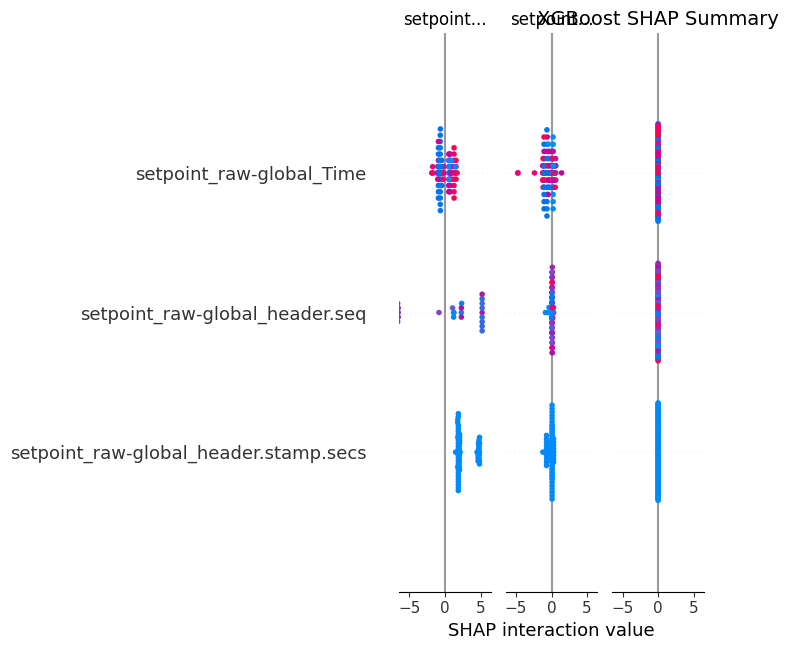

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 10

In [49]:
# ==================== XGBOOST SHAP (RELIABLE) ====================
from xgboost import XGBClassifier
import shap

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# SHAP for XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test[:100])

# 1. Summary Plot
shap.summary_plot(shap_values_xgb, X_test[:100],
                  feature_names=feature_names, show=False)
plt.title("XGBoost SHAP Summary", fontsize=14)
plt.tight_layout()
plt.savefig('shap_xgboost_summary.png', dpi=300)
plt.show()

# 2. Dependence Plot for Top Feature
shap_values_array = np.array(shap_values_xgb)
mean_abs_shap = np.mean(np.abs(shap_values_array), axis=0)
top_feature_idx = np.argmax(mean_abs_shap)
top_feature = feature_names[top_feature_idx]

shap.dependence_plot(top_feature_idx, shap_values_xgb, X_test[:100],
                     feature_names=feature_names, show=False)
plt.title(f"SHAP Dependence: {top_feature}", fontsize=14)
plt.tight_layout()
plt.savefig('shap_dependence.png', dpi=300)
plt.show()

# 3. Force Plot for Single Prediction
shap.initjs()
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0],
                X_test[0], feature_names=feature_names, matplotlib=True)
plt.title("SHAP Force Plot - Single Prediction")
plt.tight_layout()
plt.savefig('shap_force_plot.png', dpi=300)
plt.show()

# 4. Waterfall Plot
exp = shap.Explanation(values=shap_values_xgb[0],
                       base_values=explainer_xgb.expected_value,
                       data=X_test[0],
                       feature_names=feature_names)
shap.waterfall_plot(exp, show=False)
plt.title("SHAP Waterfall Plot")
plt.tight_layout()
plt.savefig('shap_waterfall.png', dpi=300)
plt.show()

### Correlation with target analysis

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


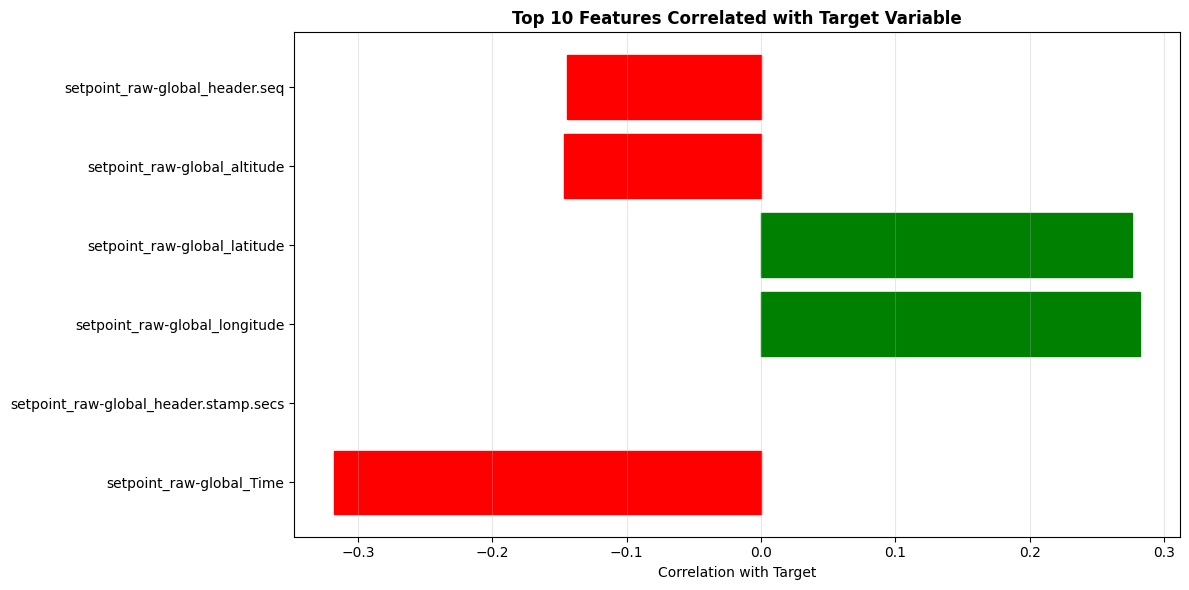


CORRELATION INSIGHTS:
----------------------------------------
  setpoint_raw-global_Time: -0.3174
    → STRONG correlation with target
  setpoint_raw-global_header.stamp.secs: nan
    → WEAK correlation with target
  setpoint_raw-global_longitude: 0.2817
    → MODERATE correlation with target
  setpoint_raw-global_latitude: 0.2763
    → MODERATE correlation with target
  setpoint_raw-global_altitude: -0.1463
    → MODERATE correlation with target


In [36]:
# Create a copy of the dataframe for correlation analysis
df_corr = df.copy()

# Convert categorical target to numerical for correlation
df_corr['target_numeric'] = df_corr['class_encoded']

# Calculate correlation with target
correlations = {}
for col in X.columns:
    if col in df_corr.columns:
        corr = np.corrcoef(df_corr[col].fillna(df_corr[col].mean()),
                          df_corr['target_numeric'])[0, 1]
        correlations[col] = corr

# Sort by absolute correlation
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)[:15]

# Plot top correlations
top_corr_features = [item[0] for item in sorted_corr[:10]]
top_corr_values = [item[1] for item in sorted_corr[:10]]

plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(top_corr_features)), top_corr_values)
plt.yticks(range(len(top_corr_features)), top_corr_features)
plt.xlabel('Correlation with Target')
plt.title('Top 10 Features Correlated with Target Variable', fontweight='bold')

# Color bars by correlation sign
for bar, value in zip(bars, top_corr_values):
    if value > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCORRELATION INSIGHTS:")
print("-"*40)
for feature, corr in sorted_corr[:5]:
    print(f"  {feature}: {corr:.4f}")
    if abs(corr) > 0.3:
        print(f"    → STRONG correlation with target")
    elif abs(corr) > 0.1:
        print(f"    → MODERATE correlation with target")
    else:
        print(f"    → WEAK correlation with target")